In [123]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt 
print(os.getcwd())

d:\PESU\Sem 5\Data Analytics\DataAnalytics


In [124]:
indicator = pd.read_csv("Indicator.csv")

csvs = [i for i in indicator.Indicator_Code]
print(csvs)

['SP.POP.GROW', 'SI.POV.GINI', 'NY.GDP.PCAP.KD.ZG', 'SE.XPD.TOTL.GB.ZS', 'SE.XPD.TOTL.GD.ZS', 'SI.DST.FRST.10', 'SI.DST.10TH.10', 'SL.UEM.TOTL.ZS', 'SP.DYN.CBRT.IN', 'SP.DYN.CDRT.IN', 'SP.DYN.LE00.IN']


### Target Variable: GDP per Capita

In [125]:
pathToFile = os.path.join("Datasets\\" + csvs[2] + "\\")
gdpPerCap = pd.read_csv(pathToFile + os.listdir(pathToFile)[0])
csvs.pop(2)

'NY.GDP.PCAP.KD.ZG'

In [126]:
features = [None]*len(csvs)
k=0
for i in csvs:
    pathToFile = os.path.join("Datasets\\" + i + "\\")
    try:
        features[k] = pd.read_csv(pathToFile + os.listdir(pathToFile)[0])
        #features
    except Exception as e:
        print(i)
    k+=1

In [127]:
#print(features)

In [128]:
years = [str(i) for i in range(1960,2000)]
#print(years)
k=0
for i in features:
    try:
        features[k] = i.drop(columns=years)
    except:
        i.head(20)
    k+=1


In [129]:
features[0].head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,...,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817
2,Angola,AGO,Population growth (annual %),SP.POP.GROW,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,...,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
3,Albania,ALB,Population growth (annual %),SP.POP.GROW,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,...,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
4,Andorra,AND,Population growth (annual %),SP.POP.GROW,1.572166,2.939992,3.942573,4.375449,4.098923,3.382417,...,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454


In [130]:
gdpPerCap = gdpPerCap.drop(columns=years)

In [142]:
def checkLinearRelationship(df,year): # year is a string >= 2000 and < 2020
    gdpYear = gdpPerCap[year]
    dfYear = df[year]
    plt.scatter(dfYear,gdpYear)
    plt.show()



Scatter Plot - GDP per Capita growth vs. Population Growth (in %)


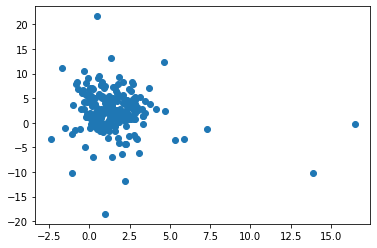



Scatter Plot - GDP per Capita growth vs. Gini Index


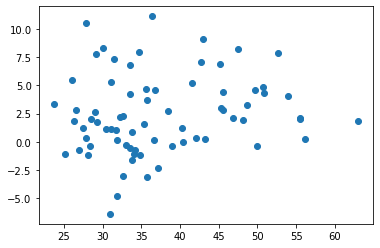



Scatter Plot - GDP per Capita growth vs. Government expenditure on education, total (% of government expenditure)


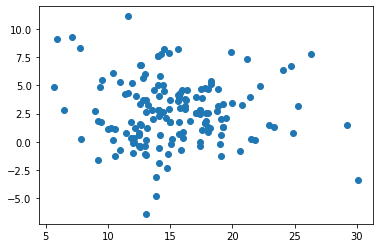



Scatter Plot - GDP per Capita growth vs. Government expenditure on education, total (% of GDP)


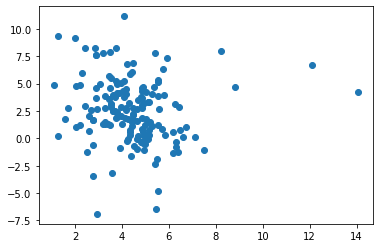



Scatter Plot - GDP per Capita growth vs. Income share held by lowest 10%


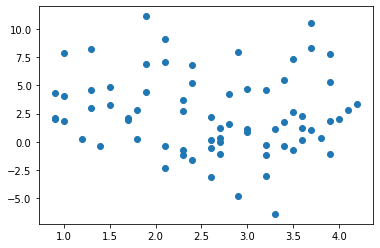



Scatter Plot - GDP per Capita growth vs. Income share held by highest 10%


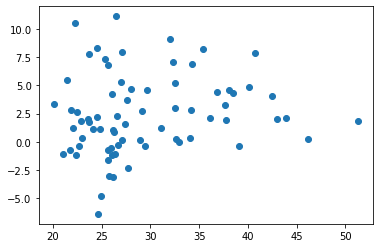



Scatter Plot - GDP per Capita growth vs. Unemployment, total (% of labour force) (modeled ISO estimate)


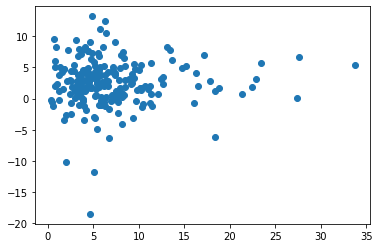



Scatter Plot - GDP per Capita growth vs. Birth Rate, crude (per 1000 people)


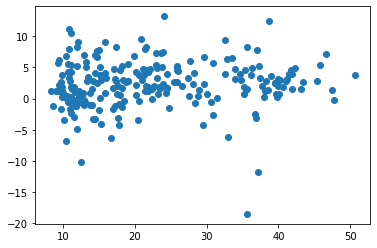



Scatter Plot - GDP per Capita growth vs. Death Rate, crude (per 1000 people)


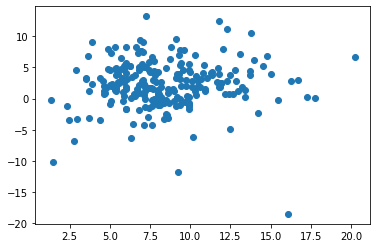



Scatter Plot - GDP per Capita growth vs. Life expectancy at birth, total (years)


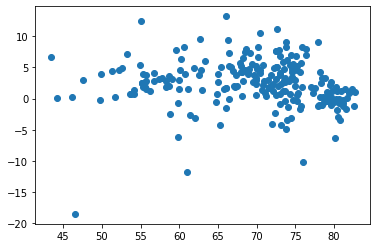

In [144]:
for i in range(len(csvs)):
    name = list(indicator[indicator["Indicator_Code"]==csvs[i]].Indicator_Name)[0]
    #print(name)
    
    print("\n\nScatter Plot - GDP per Capita growth vs. " + name)
    try:
        checkLinearRelationship(features[i],"2008")
    except Exception as e:
        print("\n\n\n\nERROR WITH :",name,"\n\n\n")
    